# Research


- [Improving Alzheimer’s Disease Prediction with Different Machine Learning Approaches and Feature Selection Techniques](https://pmc.ncbi.nlm.nih.gov/articles/PMC11482617/) - Notably, LR combined with mRMR achieved the highest accuracy of 99.08% in predicting AD
-


# EDA


In [1]:
import pandas as pd

from pathlib import Path

In [2]:
path = Path("../data/raw") / "alzheimers_disease_data.csv"

df = pd.read_csv(path)
df.head(3)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0


In [3]:
numeric_cols = [
    "Age",
    "BMI",
    "AlcoholConsumption",
    "PhysicalActivity",
    "DietQuality",
    "SleepQuality",
    "SystolicBP",
    "DiastolicBP",
    "CholesterolTotal",
    "CholesterolLDL",
    "CholesterolHDL",
    "CholesterolTriglycerides",
    "MMSE",
    "FunctionalAssessment",
    "ADL",
]

boolean_cols = [
    "Gender",
    "Ethnicity",
    "EducationLevel",
    "Smoking",
    "FamilyHistoryAlzheimers",
    "CardiovascularDisease",
    "Diabetes",
    "Depression",
    "HeadInjury",
    "Hypertension",
    "MemoryComplaints",
    "BehavioralProblems",
    "Confusion",
    "Disorientation",
    "PersonalityChanges",
    "DifficultyCompletingTasks",
    "Forgetfulness",
    "Diagnosis",
]

## Data quality inspection


In [4]:
# Any missing values?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [5]:
# Do we have patients observed multiple times?
print((df["PatientID"].value_counts().values > 1).sum())
df.drop(columns="PatientID", inplace=True)

0


In [6]:
# Look at numeric values - is there anything off
df[numeric_cols].describe()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,27.655697,10.039442,4.920202,4.993138,7.051081,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,4.982958
std,8.990221,7.217438,5.757910,2.857191,2.909055,1.763573,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,2.949775
min,60.000000,15.008851,0.002003,0.003616,0.009385,4.002629,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.001288
25%,67.000000,21.611408,5.139810,2.570626,2.458455,5.482997,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,2.342836
50%,75.000000,27.823924,9.934412,4.766424,5.076087,7.115646,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,5.038973
75%,83.000000,33.869778,15.157931,7.427899,7.558625,8.562521,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,7.581490
max,90.000000,39.992767,19.989293,9.987429,9.998346,9.999840,179.000000,119.000000,299.993353,199.965665,99.980324,399.941862,29.991381,9.996467,9.999747


In [7]:
df[boolean_cols].astype(bool).describe()

,Gender,Ethnicity,EducationLevel,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,1088,1278,1703,1529,1607,1839,1825,1718,1950,1829,1702,1812,1708,1809,1825,1808,1501,1389


In [8]:
# what is the balance of the target?
df["Diagnosis"].sum() / df["Diagnosis"].count()

np.float64(0.35365286179618427)

Around 35% of rows have a positive diagnosis. Some class disbalance is present but it is not terrible.


Summary

- Small number of rows, which will affect the train/test split
- Relatively large number of features
- Class imbalance (35/65) - requires appropriate cross-validation (Stratified)
- Two feature types: numeric and boolean


### Splitting data


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns="Diagnosis"),
    df["Diagnosis"],
    test_size=0.1,
    stratify=df["Diagnosis"],
    random_state=42,
)

print(len(X_train), len(X_test))

1934 215


In [10]:
# Save data
# TODO

df = pd.concat([X_train.copy(), y_train.copy()], axis=1)

## Visuals


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

from scipy.stats import chi2_contingency, fisher_exact

n_cols = 5

Text(0.5, 1.02, 'Box plots for each numeric feature with Diagnosis')

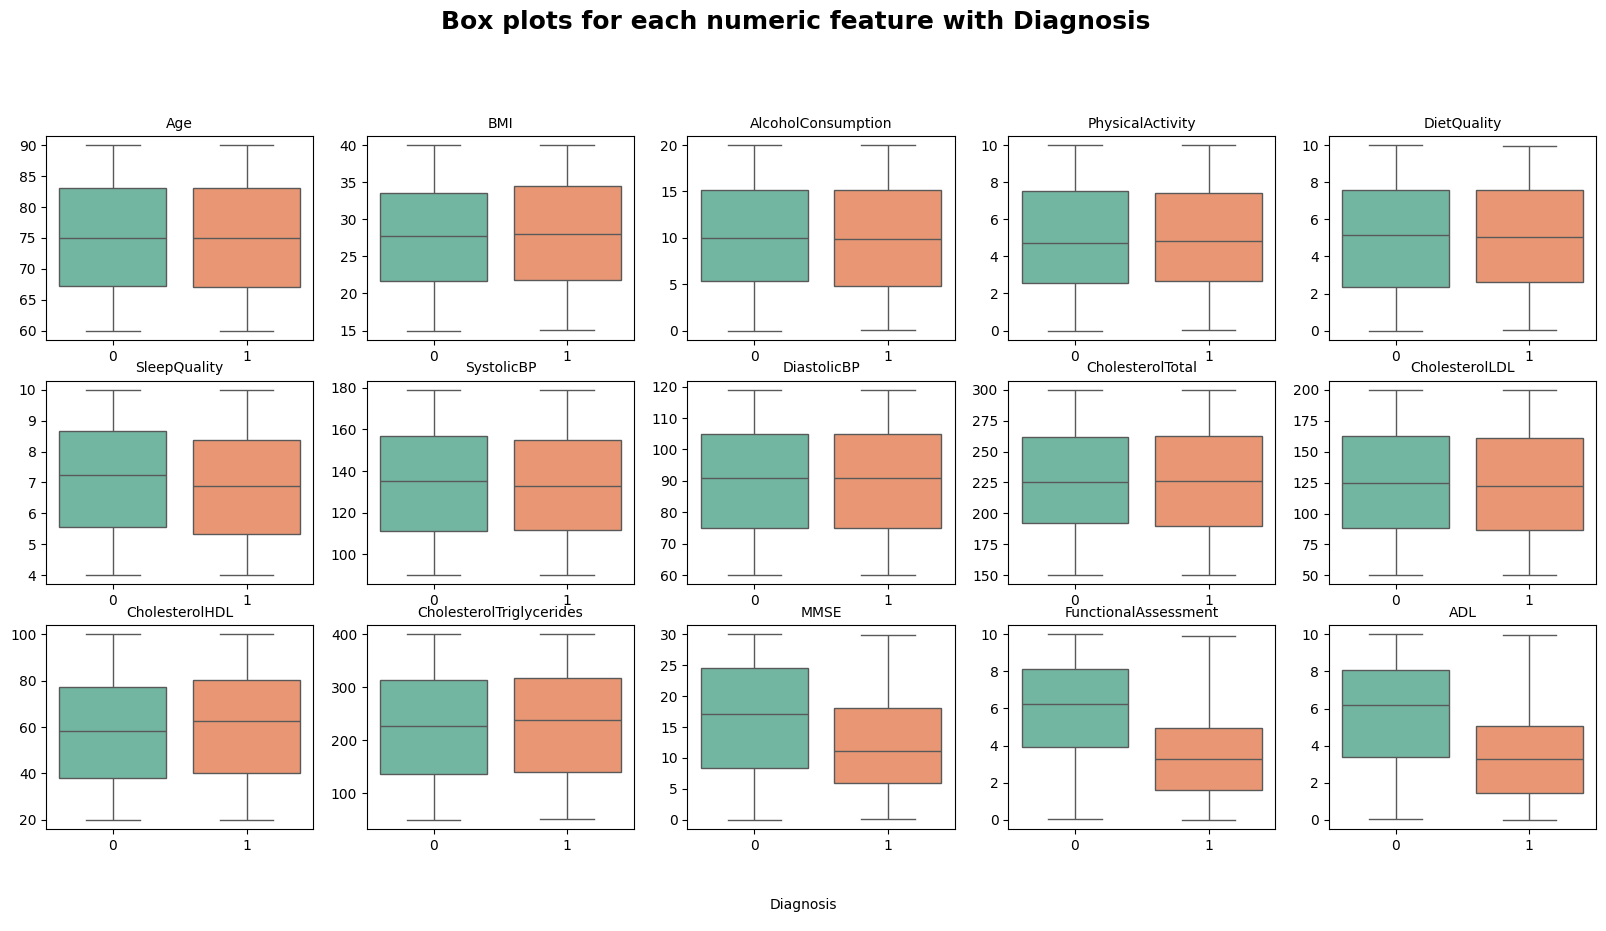

In [12]:
# Box plots for each numeric feature to check separation and outliers

n_rows = math.ceil(len(numeric_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))

for ax, col in zip(axes.flat, numeric_cols):
    sns.boxplot(
        data=df,
        x="Diagnosis",
        y=col,
        hue="Diagnosis",
        palette="Set2",
        showfliers=True,
        legend=False,
        ax=ax,
    )
    ax.set_title(col, fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel("")

handles, labels = axes.flat[0].get_legend_handles_labels()
fig.legend(
    handles, labels, title="Diagnosis", loc="lower center", ncol=2, frameon=False
)

fig.suptitle(
    "Box plots for each numeric feature with Diagnosis",
    fontsize=18,
    fontweight="bold",
    y=1.02,
)

- There are no outliers
- Features that seem to have an impact are `["MMSE", "FunctionalAssessment", "ADL"]`


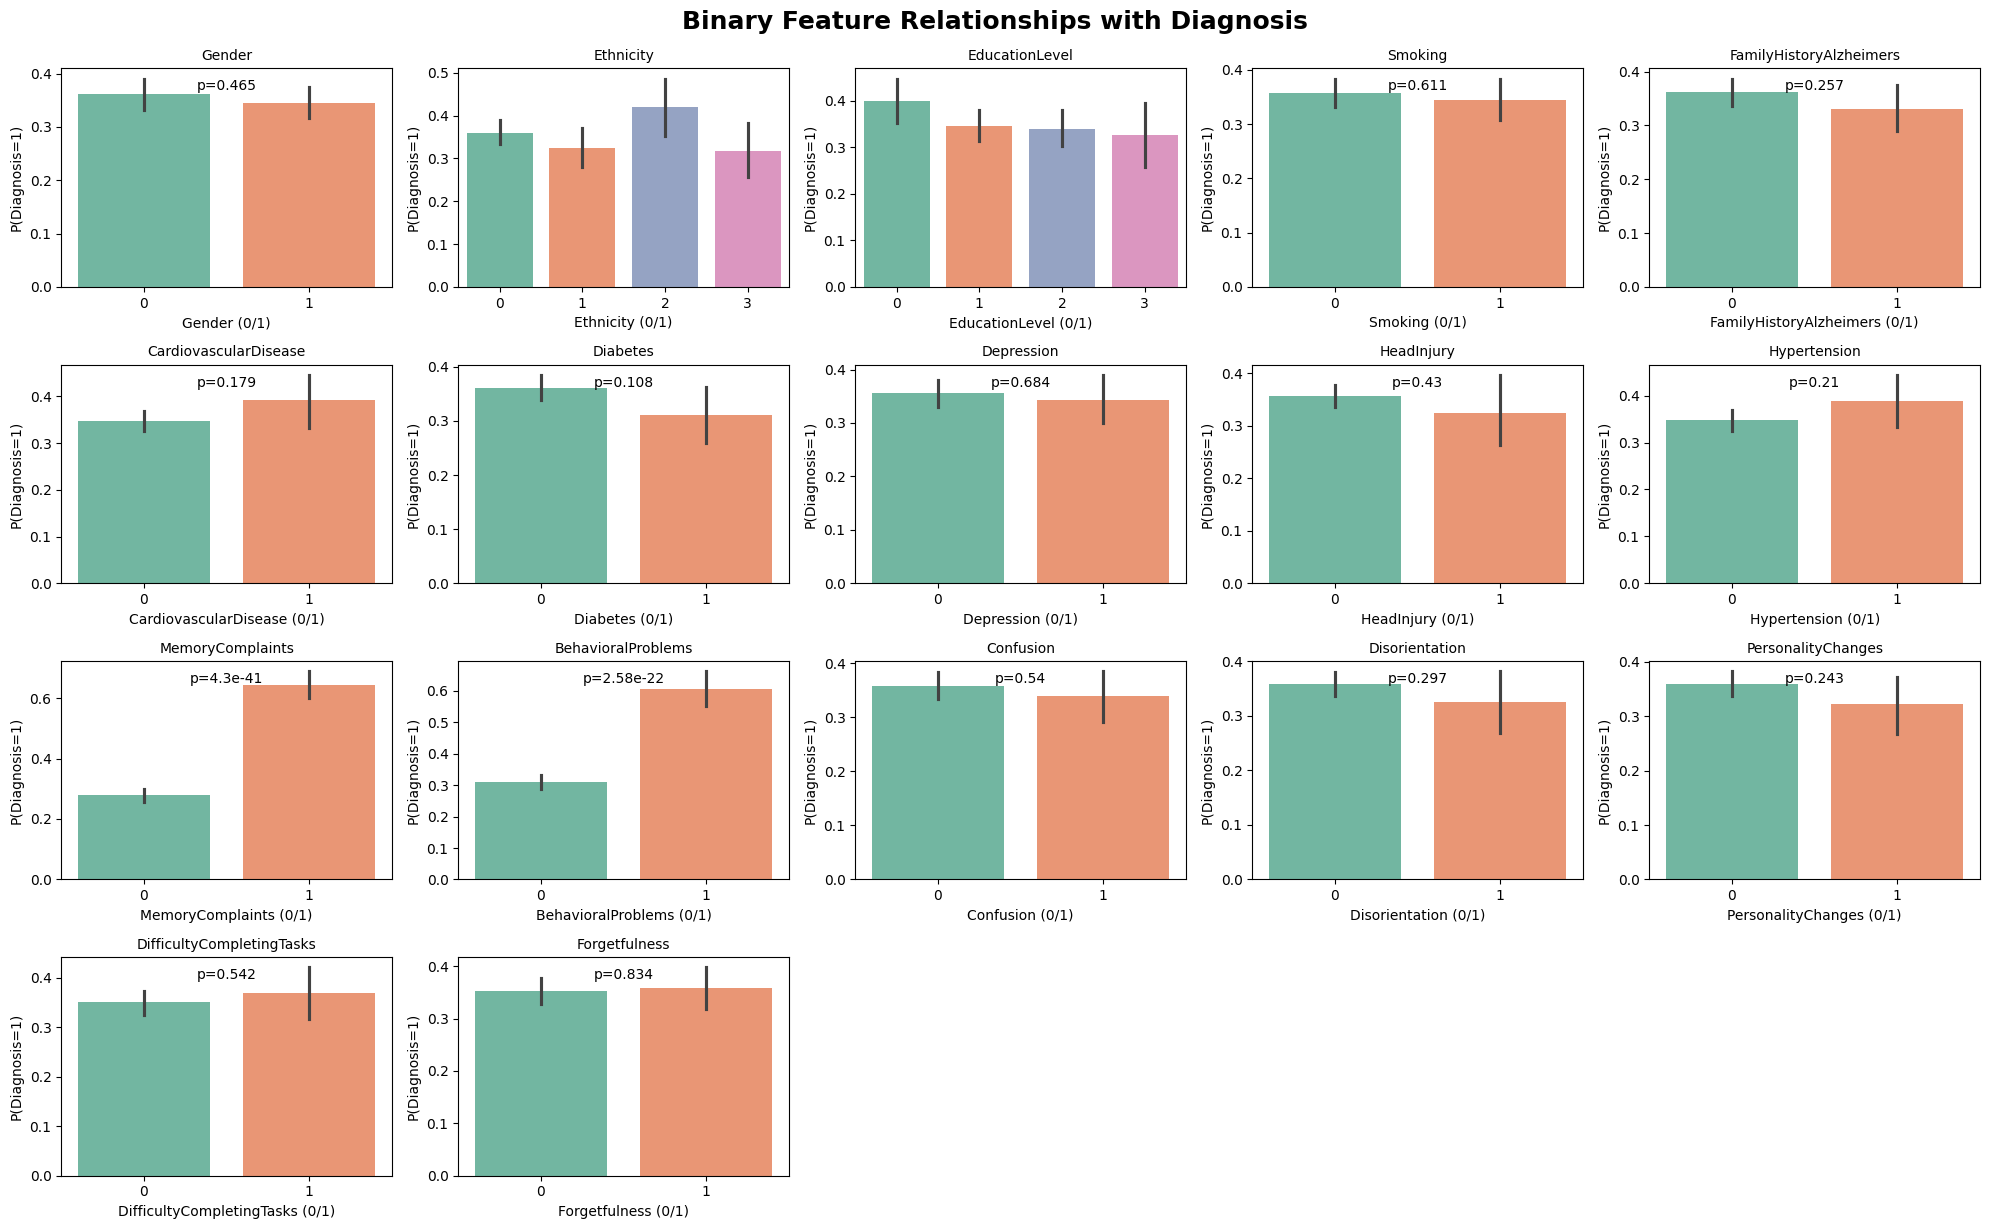

In [13]:
# binary feature list (0/1), excluding target
bin_cols = [c for c in boolean_cols if c != "Diagnosis"]

n_rows = math.ceil(len(bin_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))

for ax, col in zip(axes.flat, bin_cols):
    sns.barplot(
        data=df,
        x=col,  # 0 / 1 on x
        y="Diagnosis",  # will take mean → P(Diagnosis=1)
        hue=col,  # needed to use palette without warning
        estimator=np.mean,
        errorbar=("ci", 95),  # <-- new API (replaces ci=95)
        palette="Set2",
        legend=False,
        ax=ax,
    )
    ax.set_title(col, fontsize=10)
    ax.set_xlabel(f"{col} (0/1)")
    ax.set_ylabel("P(Diagnosis=1)")

    # p-value annotation
    ct = pd.crosstab(df[col], df["Diagnosis"])
    if ct.shape == (2, 2):
        p = fisher_exact(ct)[1] if (ct.values < 5).any() else chi2_contingency(ct)[1]
        ax.text(0.5, 0.95, f"p={p:.3g}", ha="center", va="top", transform=ax.transAxes)

# hide unused axes
for ax in axes.flat[len(bin_cols) :]:
    ax.set_visible(False)

# shared legend
handles, labels = axes.flat[0].get_legend_handles_labels()
if handles:
    fig.legend(
        handles,
        ["0", "1"],
        title="Feature value",
        loc="lower center",
        ncol=2,
        frameon=False,
    )
    plt.tight_layout(rect=[0, 0.05, 1, 1])
else:
    plt.tight_layout()

fig.suptitle(
    "Binary Feature Relationships with Diagnosis",
    fontsize=18,
    fontweight="bold",
    y=1.02,
)
plt.show()

Each subplot displays the proportion of diagnosed cases (P(Diagnosis = 1))
for each binary feature value 0 and 1.

Error bars represent 95 % confidence intervals.

p-values come from Chi² or Fisher’s exact tests.

Large gaps between bars or low p-values indicate features that
differ meaningfully between groups - i.e., stronger predictors of diagnosis.


Most of the variables do not show meaningfull difference.


In [14]:
chosen_cols = [
    "MMSE",
    "FunctionalAssessment",
    "ADL",
    "MemoryComplaints",
    "BehavioralProblems",
]

## Logistic Regressor


In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

X_bool = df[boolean_cols].drop(columns=["Diagnosis"])
X_num = df[numeric_cols]
y = df["Diagnosis"]

# Scale numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num), columns=X_num.columns, index=X_num.index
)

X_full = pd.concat([X_scaled, X_bool], axis=1)

X_slim = X_full[chosen_cols]
# Add intercept
X_slim = sm.add_constant(X_slim)

Lets test classification using the features that looked promising from visualization.


In [16]:
log_reg = sm.Logit(y, X_slim).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.374045
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 1934
Model:                          Logit   Df Residuals:                     1928
Method:                           MLE   Df Model:                            5
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                  0.4243
Time:                        14:35:07   Log-Likelihood:                -723.40
converged:                       True   LL-Null:                       -1256.5
Covariance Type:            nonrobust   LLR p-value:                2.800e-228
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.0483      0.105    -19.492      0.000      -2.254      -1.842

Interpret


## Higher level interactions


In [17]:
from sklearn.ensemble import RandomForestClassifier

X_rf = X_full.drop(columns="const", errors="ignore").copy()

rf = RandomForestClassifier(random_state=42)
rf.fit(X_rf, y)
importances = pd.Series(rf.feature_importances_, index=X_rf.columns).sort_values(
    ascending=False
)
print(importances.head(10))

FunctionalAssessment    0.190275
ADL                     0.163557
MMSE                    0.122729
MemoryComplaints        0.082099
BehavioralProblems      0.051397
CholesterolHDL          0.030775
BMI                     0.030773
SleepQuality            0.030086
DietQuality             0.029754
PhysicalActivity        0.029168
dtype: float64


In [18]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mutual_info_score
import itertools

# discretize all numeric columns
disc = KBinsDiscretizer(
    n_bins=5,
    encode="ordinal",
    strategy="quantile",
    quantile_method="averaged_inverted_cdf",
)
X_disc = X_rf.copy()
X_disc[numeric_cols] = disc.fit_transform(X_rf[numeric_cols])

pairs = []
for a, b in itertools.combinations(X_disc.columns, 2):
    combo = X_disc[a].astype(str) + "_" + X_disc[b].astype(str)
    score = mutual_info_score(y, combo)
    pairs.append((a, b, score))

pd.DataFrame(pairs, columns=["Feature 1", "Feature 2", "MI_with_target"]).sort_values(
    "MI_with_target", ascending=False
).head(10)

,Feature 1,Feature 2,MI_with_target
325,FunctionalAssessment,ADL,0.146937
306,MMSE,FunctionalAssessment,0.146469
307,MMSE,ADL,0.133664
336,FunctionalAssessment,MemoryComplaints,0.131885
318,MMSE,MemoryComplaints,0.115095
353,ADL,MemoryComplaints,0.109346
337,FunctionalAssessment,BehavioralProblems,0.105824
354,ADL,BehavioralProblems,0.095283
319,MMSE,BehavioralProblems,0.092197
99,PhysicalActivity,FunctionalAssessment,0.087592


## Benchmark


ROC-AUC: 0.905


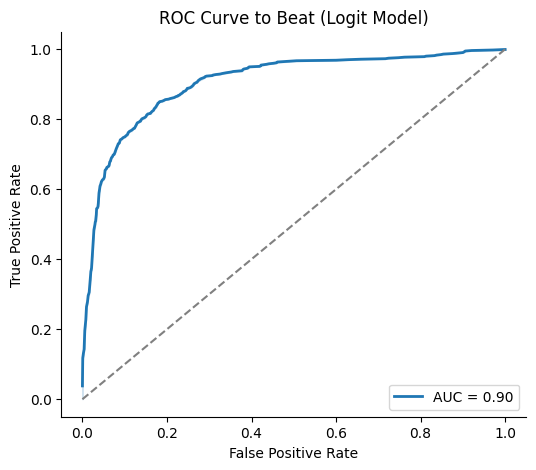

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predicted probabilities
y_pred = log_reg.predict(X_slim)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y, y_pred)
auc = roc_auc_score(y, y_pred)
print(f"ROC-AUC: {auc:.3f}")

# Prepare DataFrame for seaborn
roc_df = pd.DataFrame({"FPR": fpr, "TPR": tpr})

# Plot
plt.figure(figsize=(6, 5))
sns.lineplot(data=roc_df, x="FPR", y="TPR", label=f"AUC = {auc:.2f}", linewidth=2)
sns.lineplot(x=[0, 1], y=[0, 1], color="gray", linestyle="--")

plt.title("ROC Curve to Beat (Logit Model)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
sns.despine()